<a href="https://colab.research.google.com/github/venkatesh58285/ML/blob/main/Lab4_AP232110011217.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [ ]:
data = pd.read_csv('/content/DMV_Written_Tests.csv')
display(data.head())

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Task 3: Visualize the Data
---

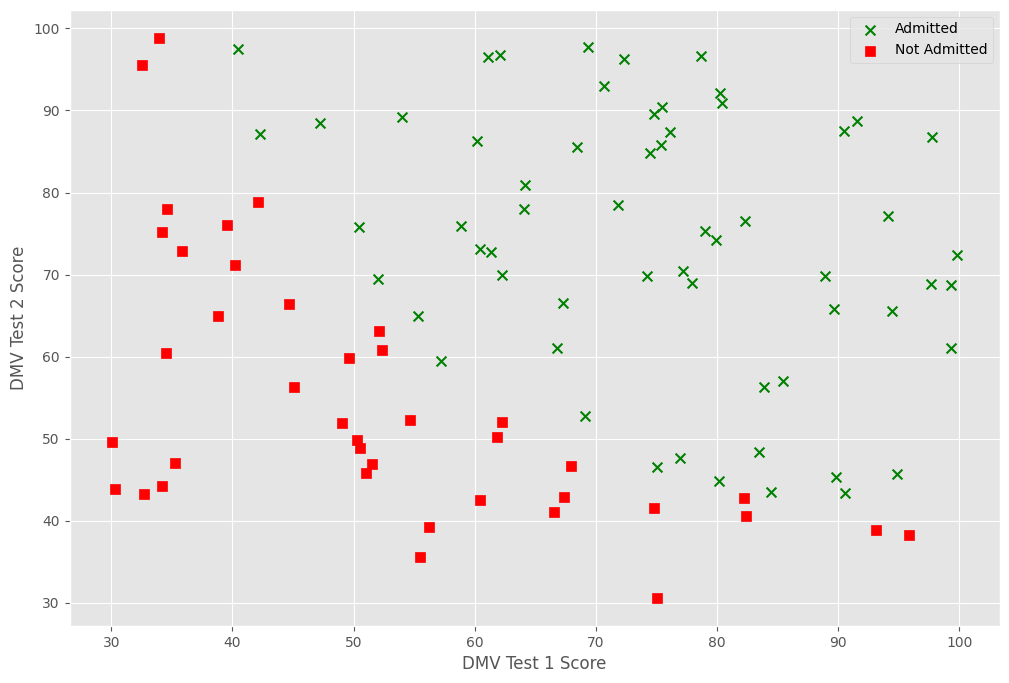

In [ ]:
admitted = data[data['Results'] == 1]
not_admitted = data[data['Results'] == 0]

plt.scatter(admitted['DMV_Test_1'], admitted['DMV_Test_2'], s=50, c='green', marker='x', label='Admitted')
plt.scatter(not_admitted['DMV_Test_1'], not_admitted['DMV_Test_2'], s=50, c='red', marker='s', label='Not Admitted')
plt.xlabel('DMV Test 1 Score')
plt.ylabel('DMV Test 2 Score')
plt.legend()
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [8]:
def cost_function(theta, x, y):
    m = len(y)
    h = sigmoid(x @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def gradient(theta, x, y):
    m = len(y)
    h = sigmoid(x @ theta)
    grad = (1/m) * (x.T @ (h - y))
    return grad

### Task 6: Cost and Gradient at Initialization
---

In [11]:
# Prepare the data
x = data[['DMV_Test_1', 'DMV_Test_2']].values
y = data['Results'].values

# Add a column of ones to x for the intercept term
m, n = x.shape
X = np.hstack((np.ones((m, 1)), x))

# Initialize parameters (theta) to zeros
initial_theta = np.zeros(n + 1)

# Compute cost and gradient at initialization
initial_cost = cost_function(initial_theta, X, y)
initial_gradient = gradient(initial_theta, X, y)

print(f"Cost at initialization: {initial_cost}")
print(f"Gradient at initialization: {initial_gradient}")

Cost at initialization: 0.6931471805599453
Gradient at initialization: [ -0.1        -12.00921659 -11.26284221]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [ ]:
admitted = data[data['Results'] == 1]
not_admitted = data[data['Results'] == 0]

plt.scatter(admitted['DMV_Test_1'], admitted['DMV_Test_2'], s=50, c='green', marker='x', label='Admitted')
plt.scatter(not_admitted['DMV_Test_1'], not_admitted['DMV_Test_2'], s=50, c='red', marker='s', label='Not Admitted')
plt.xlabel('DMV Test 1 Score')
plt.ylabel('DMV Test 2 Score')
plt.legend()
plt.show()